## W9 Handin

### 1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space

In [1]:
import pandas as pd
iris = pd.read_csv('/home/jovyan/data/iris_data.csv', decimal = ",")
iris.head()
subset = iris.drop(['Petal length', 'Petal width'], axis = 1)

#subset = iris[['Sepal length', 'Sepal width']] 
subset.head()

,Sepal length,Sepal width,Species
0,5.1,3.5,I. setosa
1,4.9,3.0,I. setosa
2,4.7,3.2,I. setosa
3,4.6,3.1,I. setosa
4,5.0,3.6,I. setosa


### 2. get unique labels (Species column)

In [2]:
unique_lables = list(set(subset['Species'])) 
unique_lables

['I. virginica', 'I. setosa', 'I. versicolor']

### 3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
### Version 1:

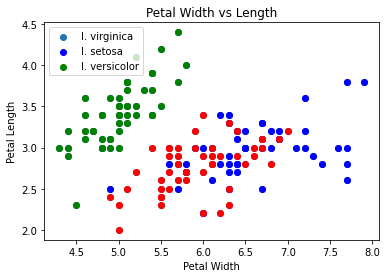

In [3]:
from itertools import cycle
import matplotlib.pylab as plt

x = subset['Sepal length']
y = subset['Sepal width']
plt.scatter(x, y)

colors = cycle('bgr')
for i, col in zip(range(len(unique_lables)), colors):
    i = subset['Species'] == unique_lables[i]
    plt.scatter(x[i], y[i], c=col)

plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.title('Petal Width vs Length')
plt.legend(unique_lables, loc='upper left')
plt.show()


### 3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
### Version 2:

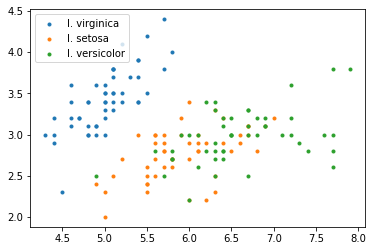

In [48]:
import matplotlib.pyplot as plt


groups = subset.groupby('Species')
for name, group in groups:
    plt.scatter(group["Sepal length"], group["Sepal width"], marker=".")
    

plt.legend(unique_lables, loc='upper left')
plt.show()


### 4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)

In [54]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

def mean_shift(subset):
    bandwidth = estimate_bandwidth(subset, quantile=0.2)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(subset)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

### 5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
### 5. create a new scatter plot where each flower is colored according to cluster label


Number of estimated clusters : 3


Text(0.5, 1.0, 'Estimated number of clusters: 3')

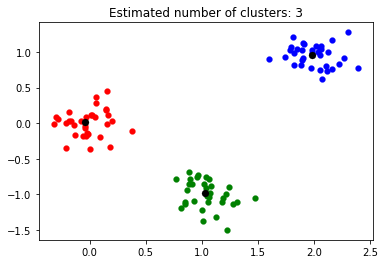

In [55]:
from sklearn.datasets import make_blobs

centers = [[2, 1], [0, 0], [1, -1]] # centers are now 2-d
data_2d, _ = make_blobs(centers=centers, cluster_std=0.2)

labels, cluster_centers, n_clusters = mean_shift(data_2d)

# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot()

colors = cycle('bgr')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='Black', s=50, linewidth=0.2)

    
plt.title('Estimated number of clusters: {}'.format(n_clusters))

### 6. add a dot for the cluster centers


### 7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)


### 8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

In [58]:
def mean_shift2(subset):
    bandwidth = estimate_bandwidth(subset, quantile=0.15)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(subset)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

Number of estimated clusters : 5


Text(0.5, 1.0, 'Estimated number of clusters: 5')

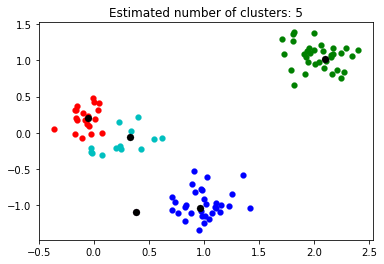

In [59]:
centers = [[2, 1], [0, 0], [1, -1]] # centers are now 2-d
data_2d, _ = make_blobs(centers=centers, cluster_std=0.2)

labels, cluster_centers, n_clusters = mean_shift2(data_2d)

# Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    
    x, y = data_2d[my_members,0], data_2d[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50,  linewidth=0.2)

    
plt.title('Estimated number of clusters: {}'.format(n_clusters))